In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from celluloid import Camera


In [2]:


# governing equation of three body problem without restriction
def three_body(y, t, m, G):
    
    x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2 = y
    
    r_01 = (x_0-x_1)**2 + (y_0-y_1)**2
    r_02 = (x_0-x_2)**2 + (y_0-y_2)**2
    r_12 = (x_2-x_1)**2 + (y_2-y_1)**2
    
    dydt = [vx_0, vx_1, vx_2, vy_0, vy_1, vy_2, 
            -G*m[1]*(x_0-x_1)/r_01**(1.5)-G*m[2]*(x_0-x_2)/r_02**(1.5),
            -G*m[0]*(x_1-x_0)/r_01**(1.5)-G*m[2]*(x_1-x_2)/r_12**(1.5), 
            -G*m[1]*(x_2-x_1)/r_12**(1.5)-G*m[0]*(x_2-x_0)/r_02**(1.5),
            -G*m[1]*(y_0-y_1)/r_01**(1.5)-G*m[2]*(y_0-y_2)/r_02**(1.5),
            -G*m[0]*(y_1-y_0)/r_01**(1.5)-G*m[2]*(y_1-y_2)/r_12**(1.5), 
            -G*m[1]*(y_2-y_1)/r_12**(1.5)-G*m[0]*(y_2-y_0)/r_02**(1.5)]
    
    return dydt



def restricted_three_body(y, t, m, G):
    
    x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2 = y

    r_02 = (x_0-x_2)**2 + (y_0-y_2)**2
    r_12 = (x_2-x_1)**2 + (y_2-y_1)**2
    
    dydt = [0, 0, vx_2, 0, 0, vy_2, 
            0,
            0, 
            -G*m[1]*(x_2-x_1)/r_12**(1.5)-G*m[0]*(x_2-x_0)/r_02**(1.5),
            0,
            0, 
            -G*m[1]*(y_2-y_1)/r_12**(1.5)-G*m[0]*(y_2-y_0)/r_02**(1.5)]
    
    return dydt



In [84]:

# setting initial values : y0 = [x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2]
y0[0:6] = np.random.rand(6) - 0.5
y0[6:12] = np.random.rand(6) - 0.5


# setting G(gravity constant), T(terminal time), m(mass of objects)
T = 5
t = np.linspace(0, T, 500)
m = np.array([1, 1, 1])
G = 0.1

# solve ODE
sol = odeint(three_body, y0, t, args=(m, G))

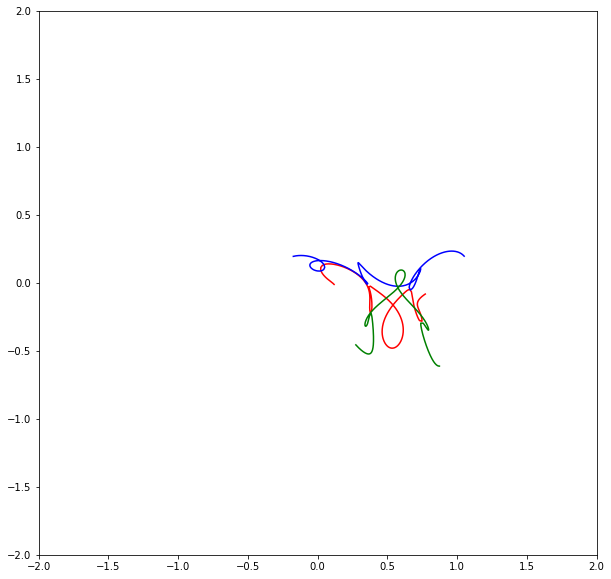

In [87]:
# plotting orbit
plt.figure(figsize=(7,10))
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.plot(sol[:,0], sol[:,3], color = 'red')
plt.plot(sol[:,1], sol[:,4], color = 'blue')
plt.plot(sol[:,2], sol[:,5], color = 'green')


plt.savefig("three_body_orbit.png")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_20444/849170179.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  animation.save(


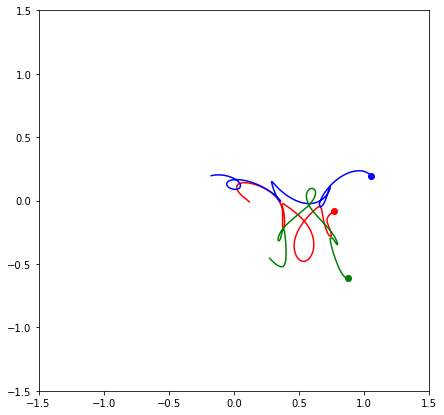

In [95]:

# making mp4 file

fig, axes = plt.subplots(1, figsize=(7, 7))
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
camera = Camera(fig)

for i in range(len(t)):
    
    plt.plot(sol[:i,0], sol[:i,3], color = 'red')
    plt.plot(sol[:i,1], sol[:i,4], color = 'blue')
    plt.plot(sol[:i,2], sol[:i,5], color = 'green')
    plt.scatter(sol[i][0], sol[i][3], color = 'red')
    plt.scatter(sol[i][1], sol[i][4], color = 'blue')
    plt.scatter(sol[i][2], sol[i][5], color = 'green')
    
    camera.snap()

animation = camera.animate(interval=50, blit=True)

animation.save(
    'three_body_dynamics.mp4',
    dpi=300,
    savefig_kwargs={
        'frameon': False,
        'pad_inches': 'tight'
    }
)